# fb prophet : pandas 기반으로 시계열 분석 할수 있는 툴
# 파이토치 (fb 공개)

In [1]:
import pandas as pd

In [3]:
import fbprophet
#대문자로 시작되었기 때문에 Class. -> 사용하기 위해선 인스턴스 해야함

In [4]:
from fbprophet import Prophet

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
data.info()
# 얘는 연습용 데이터라서 전처리가 다 되어있다. 시간 /  / 값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
ds    2905 non-null object
y     2905 non-null float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [6]:
m = Prophet()
m.fit(data)   #학습시키기

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\David\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
vars(m)

{'growth': 'linear', 'changepoints': 93     2008-03-17
 186    2008-06-20
 279    2008-10-11
 372    2009-01-14
 465    2009-04-17
 558    2009-07-19
 650    2009-10-26
 743    2010-01-31
 836    2010-05-06
 929    2010-08-14
 1022   2010-11-15
 1115   2011-02-16
 1208   2011-05-20
 1301   2011-08-21
 1394   2011-11-24
 1487   2012-02-27
 1580   2012-05-31
 1673   2012-09-01
 1765   2012-12-02
 1858   2013-03-05
 1951   2013-06-06
 2044   2013-09-08
 2137   2013-12-10
 2230   2014-03-14
 2323   2014-06-15
 Name: ds, dtype: datetime64[ns], 'n_changepoints': 25, 'specified_changepoints': False, 'changepoint_range': 0.8, 'yearly_seasonality': 'auto', 'weekly_seasonality': 'auto', 'daily_seasonality': 'auto', 'holidays': None, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10.0, 'mcmc_samples': 0, 'interval_width': 0.8, 'uncertainty_samples': 1000, 'start': Timestamp('2007-12-10 00:00:00'), 'y_scale': 12.84674688882

In [8]:
f = m.make_future_dataframe(periods=365)
f.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [9]:
vars(f)

{'_is_copy': None, '_data': BlockManager
 Items: Index(['ds'], dtype='object')
 Axis 1: RangeIndex(start=0, stop=3270, step=1)
 DatetimeBlock: slice(0, 1, 1), 1 x 3270, dtype: datetime64[ns], '_item_cache': {}}

In [11]:
forecast = m.predict(f)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203217,7.495220,8.950003
3266,2017-01-16,8.528203,7.779526,9.291137
3267,2017-01-17,8.315601,7.598434,9.031751
3268,2017-01-18,8.148207,7.407328,8.881805
3269,2017-01-19,8.160103,7.452011,8.837709


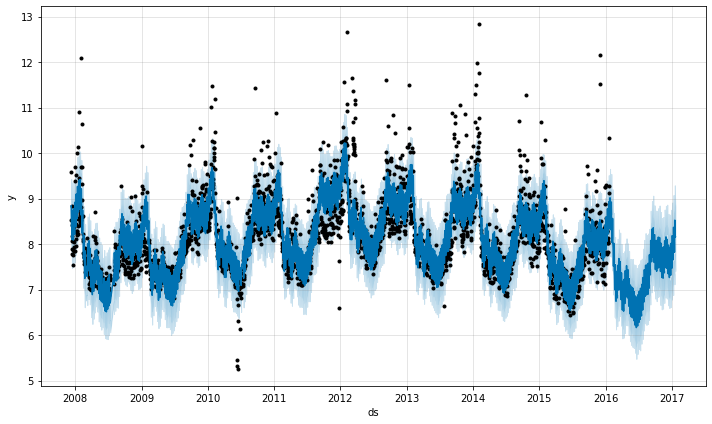

In [12]:
fig1 = m.plot(forecast)

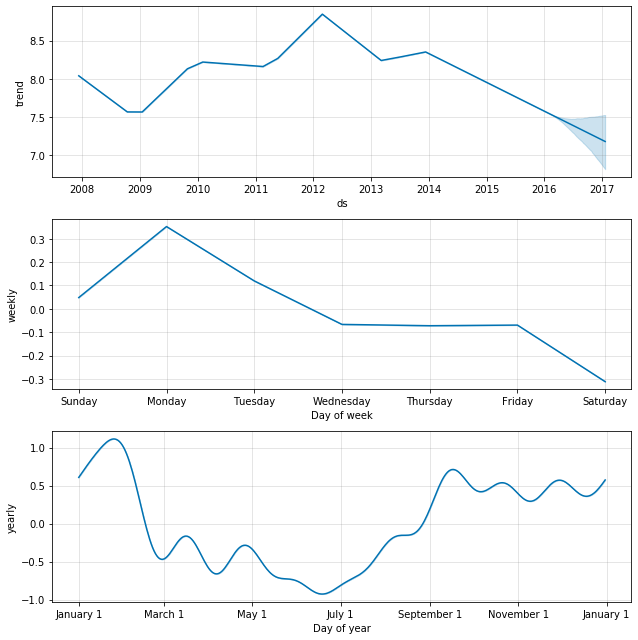

In [13]:
fig2 = m.plot_components(forecast)

In [15]:
from fbprophet.plot import plot_plotly

In [17]:
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m,forecast)
py.iplot(fig)

ModuleNotFoundError: No module named 'plot_plotly'